In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
data = pd.read_csv('D:/Jupyter Notebook/BUS_project/Data/A_bus/data_weekdays.csv')

,bus_id,route_id,type,station_id,arrival_time,latitude,longitude,station_order,name,trip_order,global_order,timestamp,time_mean,uncertainty
27614,BS34047D,00N81,2,B_YH0191,2021-11-01 00:00:48,22.519446,113.935453,1,滨海之窗南,1,1,48.0,48.0,0.0
27615,BS34047D,00N81,2,B_YH0284,2021-11-01 00:03:16,22.516944,113.936793,2,海岸城,1,1,196.0,196.0,0.0
27616,BS34047D,00N81,2,B_YH0016,2021-11-01 00:06:11,22.514648,113.933769,3,电力花园,1,1,371.0,371.0,0.0
27617,BS34047D,00N81,2,B_YH0290,2021-11-01 00:07:08,22.514907,113.929199,4,佳嘉豪苑,1,1,428.0,428.0,0.0
27618,BS34047D,00N81,2,B_YH0303,2021-11-01 00:08:53,22.515565,113.927186,5,南山书城地铁站①,1,1,533.0,533.0,0.0
27619,BS34047D,00N81,2,B_YH0283,2021-11-01 00:11:21,22.528346,113.929843,6,桂庙新村,1,1,681.0,681.0,0.0
27620,BS34047D,00N81,2,B_YH0034,2021-11-01 00:13:43,22.533842,113.932150,7,深圳大学,1,1,823.0,823.0,0.0
27621,BS34047D,00N81,2,B_YH0301,2021-11-01 00:16:28,22.539280,113.938288,8,深大北门②,1,1,988.0,988.0,0.0
27622,BS34047D,00N81,2,B_YH0234,2021-11-01 00:18:09,22.539671,113.946817,9,科技园②,1,1,1089.0,1089.0,0.0
27623,BS34047D,00N81,2,B_YH0275,2021-11-01 00:20:58,22.540128,113.955469,10,大冲②,1,1,1258.0,1258.0,0.0


In [15]:
df = data.loc[data.timestamp>=86400,:]
# np.where(np.diff(df.station_order.values)<0)[0]
df

,bus_id,route_id,type,station_id,arrival_time,latitude,longitude,station_order,name,trip_order,global_order,timestamp,time_mean,uncertainty
53209,BS04126D,02040,2,B_NS0146,2021-11-02 00:02:04,22.493651,113.891365,39,月亮湾花园东,8,116,86524.0,86394.833333,116.878427
53210,BS04126D,02040,2,A1B0002,2021-11-02 00:04:33,22.494413,113.894186,40,荔山工业园总站,8,116,86673.0,86544.833333,109.605505
55519,BS08576D,02040,1,C_GY0029,2021-11-02 00:00:32,22.541633,114.109619,41,深圳书城,8,115,86432.0,86294.500000,194.454365
55520,BS08576D,02040,1,C_GY0046,2021-11-02 00:03:02,22.542470,114.114348,42,人民桥,8,115,86582.0,86445.500000,193.040151
55521,BS08576D,02040,1,C_NH0082,2021-11-02 00:06:00,22.540991,114.118640,43,国贸,8,115,86760.0,86627.500000,187.383297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347329,BS36565D,M2093,1,E_XX0758,2021-11-08 00:08:53,22.597523,113.882291,32,凤岗小学,4,96,86933.0,87185.714286,332.374144
1347330,BS36565D,M2093,1,E_XX0024,2021-11-08 00:11:56,22.599560,113.886384,33,铁岗村,4,96,87116.0,87352.142857,323.578135
1347331,BS36565D,M2093,1,E_XX0759,2021-11-08 00:14:39,22.598973,113.890015,34,铁岗公园,4,96,87279.0,87508.428571,316.928413
1347332,BS36565D,M2093,1,E_XX0656,2021-11-08 00:17:46,22.601723,113.891528,35,易瑞生物,4,96,87466.0,87666.857143,316.666190


In [88]:
data = pd.read_csv('D:/A-bus/BATP/data/data_toyset.csv')
data = data.sort_values(by=['global_order','date'])
data = data.loc[data.route_info=='1/00740', :]
data
# max(data.loc[data.route_info=='1/00740', 'station_order']) # 38

,station_order,global_order,timestamp,route_info,route_id,type,date
950,1,1,22405.0,1/00740,00740,1,1
951,2,1,22556.0,1/00740,00740,1,1
952,3,1,22622.0,1/00740,00740,1,1
953,4,1,22707.0,1/00740,00740,1,1
954,5,1,22787.0,1/00740,00740,1,1
...,...,...,...,...,...,...,...
123039,34,110,62703.0,1/00740,00740,1,30
123040,35,110,62830.0,1/00740,00740,1,30
123041,36,110,63140.0,1/00740,00740,1,30
123042,37,110,63189.0,1/00740,00740,1,30


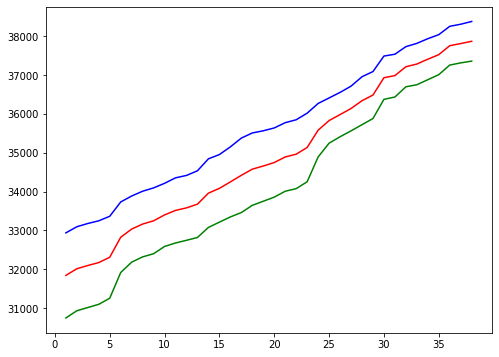

In [32]:
import matplotlib.pyplot as plt
go = 35
data25 = data.loc[(data.date==25)&(data.global_order==go),'timestamp']
data26 = data.loc[(data.date==26)&(data.global_order==go),'timestamp']
data27 = data.loc[(data.date==27)&(data.global_order==go),'timestamp']
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(list(range(1,39)), data25, color="green")
ax.plot(list(range(1,39)), (data25.values+data27.values)/2, color="red")
ax.plot(list(range(1,39)), data27, color="blue")
plt.show()
# for i in range(1,111):
#     data.loc[(data.date==26)&(data.global_order==i), 'timestamp'] = (data.loc[(data.date==27)&(data.global_order==i), 'timestamp'].values+data.loc[(data.date==25)&(data.global_order==i), 'timestamp'].values)//2


In [52]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(data['timestamp'].values.reshape(-1,1))
print(scaler.mean_,scaler.var_)
data.loc[:,'timestamp'] = scaler.fit_transform(data['timestamp'].values.reshape(-1,1))

[41950.91110048] [1.12781839e+08]


In [89]:
## train
# train = data.loc[~data.global_order.isin([71,79,72,28,78,49,42,73,11,3,102,40,81,90,61,91,5,50,44,88]),:]
# train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/train.csv', index=False)
# train = data.loc[data.global_order.isin([49,42,73,11,3,102,40,81,90,61,91,5,50,44,88]),:]
# train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/val.csv', index=False)
# train = data.loc[data.global_order.isin([71,79,72,28,78]),:]
# train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/test.csv', index=False)

train = data.loc[data.date<=26,:]
train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/train.csv', index=False)
train = data.loc[(data.date>26)&(data.date<=29),:]
train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/val.csv', index=False)
train = data.loc[data.date==30,:]
train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/test.csv', index=False)

In [82]:
 # X = np.stack([np.roll(ts, i, axis = 0) for i in range(lags, 0, -1)], axis = 1)[33:-5,]
X_train, Y_train = [], []
train = pd.read_csv('D:/A-bus/BATP/data/dataset/1-00720-step/test.csv')
for i in range(min(train.date), max(train.date)+1):
    for j in range(min(train.global_order), max(train.global_order)+1):
        time_df = train.loc[(train.date==i)&(train.global_order==j), 'station_order']
        X = np.stack([np.roll(time_df, i, axis = 0) for i in range(33, 0, -1)], axis = 1)
        Y = np.stack([np.roll(time_df, -i, axis = 0) for i in range(0, 5, 1)], axis = 1)
        if i == min(train.date) and j == min(train.global_order):
            X_train,Y_train = X,Y
        else:
            X_train = np.concatenate((X_train, X), axis=0)
            Y_train = np.concatenate((Y_train, Y), axis=0)


In [83]:
print(Y_train.shape)
# Y_train = Y_train.reshape(-1,5,38)
# Y_train = Y_train[:,:,:,np.newaxis,np.newaxis]
Y_train

(4180, 5)


array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       ...,
       [36, 37, 38,  1,  2],
       [37, 38,  1,  2,  3],
       [38,  1,  2,  3,  4]], dtype=int64)

In [84]:
### shuffle index of origin data, len=434
data = data.groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data = data.loc[data.route_info=='1/00740']
data = shuffle(data)
data = data.reset_index(drop=True)
data

,global_order,route_info,timestamp
0,1,1/00740,"[-1.840502166378519, -1.826283549211251, -1.82..."
1,79,1/00740,"[0.5575476574546787, 0.5748736545326741, 0.581..."
2,11,1/00740,"[-1.575056591580318, -1.558013083585116, -1.55..."
3,80,1/00740,"[0.5702596661803818, 0.602369258591232, 0.6096..."
4,34,1/00740,"[-1.1163884841514293, -1.0054644376412198, -0...."
...,...,...,...
105,88,1/00740,"[0.814801048851871, 0.831844556847073, 0.84107..."
106,73,1/00740,"[0.36969241739706576, 0.39502227182087424, 0.4..."
107,63,1/00740,"[-0.024568179154926963, 0.012720379773802226, ..."
108,42,1/00740,"[-0.7705276837847064, -0.7582864901969922, -0...."


In [9]:
saveTrain = 'D:/A-bus/BATP/data/dataset/partial-prediction/train.txt'
data_train = data.loc[:90,'timestamp'].reset_index(drop=True)
saveFile = open(saveTrain,'a')
for i in range(len(data_train)):
    lineToWrite = data_train[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()

saveVal = 'D:/A-bus/BATP/data/dataset/partial-prediction/val.txt'
data_val = data.loc[90:105,'timestamp'].reset_index(drop=True)
saveFile = open(saveVal,'a')
for i in range(len(data_val)):
    lineToWrite = data_val[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()

saveTest = 'D:/A-bus/BATP/data/dataset/partial-prediction/test.txt'
data_test = data.loc[105:,'timestamp'].reset_index(drop=True)
saveFile = open(saveTest,'a')
for i in range(len(data_test)):
    lineToWrite = data_test[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()

In [26]:
###  train:344   val:86+3   test:1 bz=16
###  train:90   val:15   test:5 bz=15
saveTrain = 'D:/A-bus/BATP/data/dataset/1-00740/train.txt'
data_train = data.loc[:89,'timestamp'].reset_index(drop=True)
saveFile = open(saveTrain,'a')
TrainOrder = 'D:/A-bus/BATP/data/dataset/1-00740/train_order.txt'
trainOrder = data.loc[:89,'global_order'].reset_index(drop=True)
saveOrder = open(TrainOrder,'a')
for i in range(len(data_train)):
    lineToWrite = data_train[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
for i in range(len(trainOrder)):
    lineToWrite = trainOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

saveVal = 'D:/A-bus/BATP/data/dataset/1-00740/val.txt'
data_val = data.loc[90:104,'timestamp'].reset_index(drop=True)
saveFile = open(saveVal,'a')
ValOrder = 'D:/A-bus/BATP/data/dataset/1-00740/val_order.txt'
valOrder = data.loc[90:104,'global_order'].reset_index(drop=True)
saveOrder = open(ValOrder,'a')
for i in range(len(data_val)):
    lineToWrite = data_val[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
for i in range(len(valOrder)):
    lineToWrite = valOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

saveTest = 'D:/A-bus/BATP/data/dataset/1-00740/test.txt'
data_test = data.loc[105:,'timestamp'].reset_index(drop=True)
saveFile = open(saveTest,'a')
TestOrder = 'D:/A-bus/BATP/data/dataset/1-00740/test_order.txt'
testOrder = data.loc[105:,'global_order'].reset_index(drop=True)
saveOrder = open(TestOrder,'a')
for i in range(len(data_test)):
    lineToWrite = data_test[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
for i in range(len(testOrder)):
    lineToWrite = testOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

In [90]:
##### make KNN-dataset
##### time begins with 0
##### add lat and lon, helping to interpolate

data_ = data.copy()
data_ = data_.loc[data_.route_info=='1/00740',:]
data_ = data_.reset_index(drop=True)
# ### add trip_num, helping to group same trip
station_diff = np.where(np.diff(data_['station_order'])==-37)[0]+1
a = np.array([i+1 for i in range(len(station_diff)+1)])
data_['trip_num'] = np.repeat(a,38)
# ### make time of trip is relative to the first station
data_ = data_.groupby(['trip_num'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data_.timestamp = data_.timestamp.apply(lambda x: [i-x[0] for i in x])
data_

,trip_num,timestamp
0,1,"[0.0, 151.0, 217.0, 302.0, 382.0, 648.0, 754.0..."
1,2,"[0.0, 133.0, 204.0, 293.0, 383.0, 733.0, 861.0..."
2,3,"[0.0, 184.0, 249.0, 318.0, 402.0, 665.0, 778.0..."
3,4,"[0.0, 180.0, 246.0, 320.0, 406.0, 686.0, 812.0..."
4,5,"[0.0, 133.0, 203.0, 269.0, 352.0, 656.0, 792.0..."
...,...,...
3295,3296,"[0.0, 487.0, 573.0, 635.0, 711.0, 907.0, 1104...."
3296,3297,"[0.0, 537.0, 625.0, 689.0, 795.0, 1097.0, 1200..."
3297,3298,"[0.0, 295.0, 374.0, 439.0, 534.0, 902.0, 1037...."
3298,3299,"[0.0, 211.0, 310.0, 413.0, 479.0, 736.0, 837.0..."


In [120]:
### interpolate 10m
l = [380,
 200,
 280,
 470,
 2890,
 780,
 750,
 560,
 560,
 320,
 280,
 240,
 1460,
 460,
 690,
 380,
 570,
 320,
 360,
 620,
 440,
 510,
 1330,
 1270,
 1320,
 550,
 350,
 380,
 410,
 340,
 640,
 220,
 360,
 410,
 780,
 140,
 70]
l = [380,
 200,
 280,
 470,
 2890,
 780,
 750,
 560,
 560,
 320,
 280,
 240,
 1460,
 460,
 690,
 380,
 570,
 320,
 360,
 620,
 440,
 510,
 1330,
 1270,
 1320,
 550,
 350,
 380,
 410,
 340,
 640,
 220,
 360,
 410,
 780,
 140,
 70]
l = [int(i/10) for i in l]
l = np.cumsum(l)   # test: l[2:]
time = data_.timestamp[0]
l

array([  38,   58,   86,  133,  422,  500,  575,  631,  687,  719,  747,
        771,  917,  963, 1032, 1070, 1127, 1159, 1195, 1257, 1301, 1352,
       1485, 1612, 1744, 1799, 1834, 1872, 1913, 1947, 2011, 2033, 2069,
       2110, 2188, 2202, 2209])

In [128]:
def func(time):
 time_array = np.linspace(time[0],time[1],5)
 distance_array = np.linspace(0,l[0],5)
 for i in range(1,len(l)):
   index = np.linspace(time[i],time[i+1],5)
   time_array = np.concatenate((time_array,index[1:]))
   index = np.linspace(l[i-1],l[i],5)
   distance_array = np.concatenate((distance_array,index[1:]))
 coord = []
 for a, b in zip(distance_array,time_array):
     coord.append( [ a, b ] )
 return coord

# time_array = np.linspace(time[0],time[1],5)
# distance_array = np.linspace(0,l[0],5)
# time_array, distance_array
# for i in range(1,len(l)):
#   index = np.linspace(time[i],time[i+1],5)
#   time_array = np.concatenate((time_array,index[1:]))
#   index = np.linspace(l[i-1],l[i],5)
#   distance_array = np.concatenate((distance_array,index[1:]))
# coord = []
# for a, b in zip(distance_array,time_array):
#     coord.append( [ a, b ] )
# [coord[i] for i in range(0,150) if i%4==0]  # 每个站点之间插3个点

In [129]:
data_['coord'] = data_['timestamp'].apply(lambda x: func(x))

In [131]:
###'1/00740'  totoal:3300
saveTrain = 'D:/A-bus/bus_pytorch/data/dataset/knn-dataset/train.csv'
data_train = data_['coord'].reset_index(drop=True)
pd.DataFrame(data_train).to_csv(saveTrain,index=False)

In [81]:
filename = 'D:/A-bus/bus_pytorch/data/dataset/knn-dataset/train.txt'
import json
with open(filename, 'r') as f:
    data = f.readlines()
np.array(json.loads(data))

TypeError: the JSON object must be str, bytes or bytearray, not list

In [19]:
import torch
A1,A2,A3 = 60 * torch.rand(3,4500)

In [23]:
A4 = torch.max(A1, A2)
A4.shape

torch.Size([4500])

In [25]:
t0 = 96
mask = torch.zeros(t0+24,t0+24)
for i in range(0,t0):
    mask[i,t0:] = 1
for i in range(t0,t0+24):
    mask[i,i+1:] = 1
mask = mask.float().masked_fill(mask == 1, float('-inf'))#.masked_fill(mask == 1, float(0.0))
mask

tensor([[0., 0., 0.,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        ...,
        [0., 0., 0.,  ..., 0., -inf, -inf],
        [0., 0., 0.,  ..., 0., 0., -inf],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [29]:
x = torch.cat(4500*[torch.arange(0,t0+24).type(torch.float).unsqueeze(0)])
x.shape

torch.Size([4500, 120])

In [31]:
fx = torch.cat([A1.unsqueeze(1)*torch.sin(np.pi*x[0,0:12]/6)+72 ,
                        A2.unsqueeze(1)*torch.sin(np.pi*x[0,12:24]/6)+72 ,
                        A3.unsqueeze(1)*torch.sin(np.pi*x[0,24:t0]/6)+72,
                        A4.unsqueeze(1)*torch.sin(np.pi*x[0,t0:t0+24]/12)+72],1)
fx.shape

torch.Size([4500, 120])

In [30]:
(A1.unsqueeze(1)*torch.sin(np.pi*x[0,0:12]/6)+72).shape

torch.Size([4500, 12])

In [8]:
# POS EMBEDDING
# 1. no period
d_model = 128
import torch
PE = torch.zeros((29, d_model))  # [29, 128]
pos = torch.arange(29).unsqueeze(1)
PE[:, 0::2] = torch.sin(pos/torch.pow(1000, torch.arange(0, d_model, 2)/d_model))
PE[:, 1::2] = torch.sin(pos/torch.pow(1000, torch.arange(1, d_model, 2)/d_model))

torch.Size([29, 1])

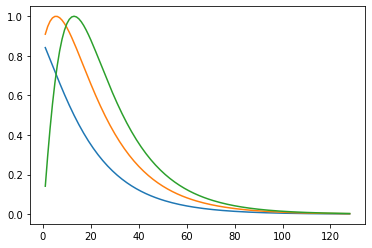

In [23]:
plt.plot(list(range(1,129)),PE[1,:])
plt.plot(list(range(1,129)),PE[2,:])
plt.plot(list(range(1,129)),PE[3,:])

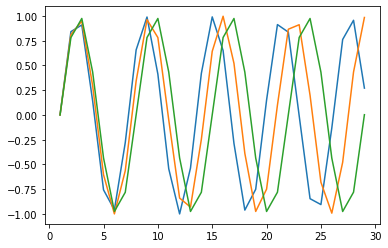

In [26]:
plt.plot(list(range(1,30)),PE[:,0])
plt.plot(list(range(1,30)),PE[:,1])
plt.plot(list(range(1,30)),PE[:,2])

In [35]:
# 3. period
d_model = 128
period = 7
PE = torch.zeros((29, d_model))  # [29, 128]
pos = torch.arange(29).unsqueeze(1) # [29, 1]
PE = torch.sin(pos * 2 * np.pi / period)
print(PE.shape)
PE = PE.repeat((1, d_model))
print(PE.shape)

torch.Size([29, 1])
torch.Size([29, 128])


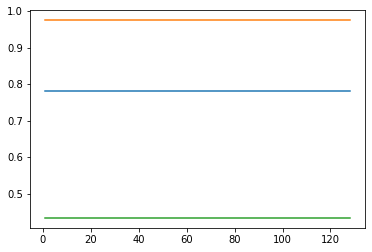

In [37]:
plt.plot(list(range(1,129)),PE[1,:])
plt.plot(list(range(1,129)),PE[2,:])
plt.plot(list(range(1,129)),PE[3,:])

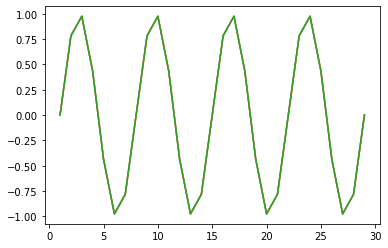

In [40]:
plt.plot(list(range(1,30)),PE[:,0])
plt.plot(list(range(1,30)),PE[:,1])
plt.plot(list(range(1,30)),PE[:,2])

In [71]:
#### convolutional attention
class CausalConv1d(torch.nn.Conv1d):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 dilation=1,
                 groups=1,
                 bias=True):

        super(CausalConv1d, self).__init__(
            in_channels,
            out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=0,
            dilation=dilation,
            groups=groups,
            bias=bias)

        self.__padding = (kernel_size - 1) * dilation

    def forward(self, input):
        return super(CausalConv1d, self).forward(F.pad(input, (self.__padding, 0)))

In [72]:
kernel_size = 3
in_channels=1
out_channels=1
dilation = 1
x = torch.randint(1,10,(1,20)).type(torch.float)
convlayer = CausalConv1d(in_channels,out_channels,kernel_size,dilation=dilation)
print(convlayer(x.unsqueeze(0)).shape)
print(convlayer(x.unsqueeze(0)))

torch.Size([1, 1, 20])
tensor([[[-1.6832, -4.9013, -6.0907, -3.7566, -2.4711, -2.5708, -3.8122,
          -4.8550, -5.6173, -3.7324, -4.0656, -5.2786, -6.4146, -4.5795,
          -3.3794, -3.6677, -4.7959, -4.9867, -4.7589, -5.1568]]],
       grad_fn=<ConvolutionBackward0>)


In [64]:
__padding = (kernel_size - 1) * dilation
x_pad = F.pad(x, (__padding, 0))
torch.dot(convlayer.weight[0][0],x_pad[0][0:3])+convlayer.bias[0]

tensor(0.9517, grad_fn=<AddBackward0>)

In [68]:
class context_embedding(torch.nn.Module):
    def __init__(self, in_channels=1,embedding_size=256,k=5):
        super(context_embedding,self).__init__()
        self.causal_convolution = CausalConv1d(in_channels,embedding_size,kernel_size=k)

    def forward(self, x):
        x = self.causal_convolution(x)
        return F.sigmoid(x)
embedding = context_embedding(1,256,5)
embedding(x.unsqueeze(0)).shape

F:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([1, 256, 20])